In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

## Load Dataset

Text(0, 0.5, 'Diabetes Risk')

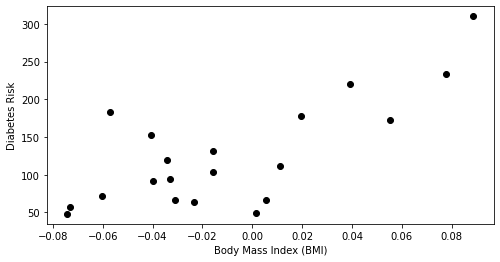

In [2]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of onens
X['one'] = 1

# Collect 20 data points
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

## Ordinary Least Squares

- Type: Supervised learning (regression)
- Model family: Linear models
- Objective function: Mean squared error
- Optimizer: Normal equations

In [3]:
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
theta_best_df = pd.DataFrame(data=theta_best[np.newaxis, :], columns=X.columns)
theta_best_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
0,-3.888868,204.648785,-64.289163,-262.796691,14003.726808,-11798.307781,-5892.15807,-1136.947646,-2736.597108,-393.879743,155.698998


In [4]:
# Collect 3 data points for testing
X_test = X.iloc[:3]
y_test = y.iloc[:3]

# generate predictions on the new patients
y_test_pred = X_test.dot(theta_best)

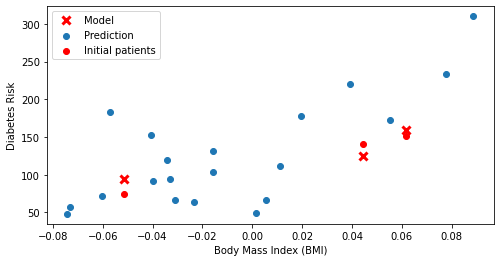

In [5]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_train.loc[:, ['bmi']], y_train)
plt.scatter(X_test.loc[:, ['bmi']], y_test, color='red', marker='o')
plt.plot(X_test.loc[:, ['bmi']], y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

## Non-Linear Least Squares: Polynomial Regression

- Type: Supervised learning (regression)
- Model family: Linear
- Features: Non-linear functions of the attributes
- Objective function: Mean squared error
- Optimizer: Normal equations

In [7]:
X_bmi = X_train.loc[:, ['bmi']]

X_bmi_p3 = pd.concat([X_bmi, X_bmi**2, X_bmi**3], axis=1)
X_bmi_p3.columns = ['bmi', 'bmi2', 'bmi3']
X_bmi_p3['one'] = 1
X_bmi_p3.head()

,bmi,bmi2,bmi3,one
422,0.077863,0.006063,0.000472,1
423,-0.039618,0.001570,-0.000062,1
424,0.011039,0.000122,0.000001,1
425,-0.040696,0.001656,-0.000067,1
426,-0.034229,0.001172,-0.000040,1


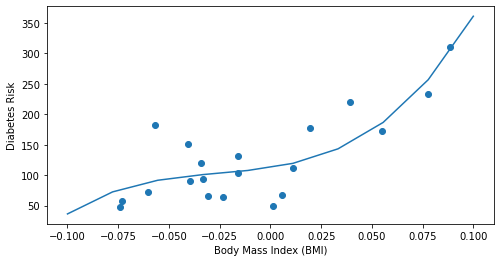

In [8]:
# Fit a linear regression
theta = np.linalg.inv(X_bmi_p3.T.dot(X_bmi_p3)).dot(X_bmi_p3.T).dot(y_train)

# Show the learned polynomial curve
x_line = np.linspace(-0.1, 0.1, 10)
x_line_p3 = np.stack([x_line, x_line**2, x_line**3, np.ones(10,)], axis=1)
y_train_pred = x_line_p3.dot(theta)

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_bmi, y_train)
plt.plot(x_line, y_train_pred)